In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/SWING/HOMERUN/RainFall_final.csv')

In [4]:
rainFall = df.copy()
rainFall.head()

,Date,Gu,DailyRain
0,2023-01-01,강남구,0.0
1,2023-01-01,서대문구,0.0
2,2023-01-01,종로구,0.0
3,2023-01-01,중구,0.0
4,2023-01-01,강남구,0.0


In [7]:
# df.info()
# 'Gu' 컬럼에서 '강남구'와 일치하는 데이터만 필터링하여 새로운 데이터프레임 생성
gangnam = rainFall[rainFall['Gu'] == '강남구'].reset_index(drop=True)
# gangnam
gangnam.head()

,Date,Gu,DailyRain
0,2023-01-01,강남구,0.0
1,2023-01-01,강남구,0.0
2,2023-01-01,강남구,0.0
3,2023-01-01,강남구,0.0
4,2023-01-01,강남구,0.0


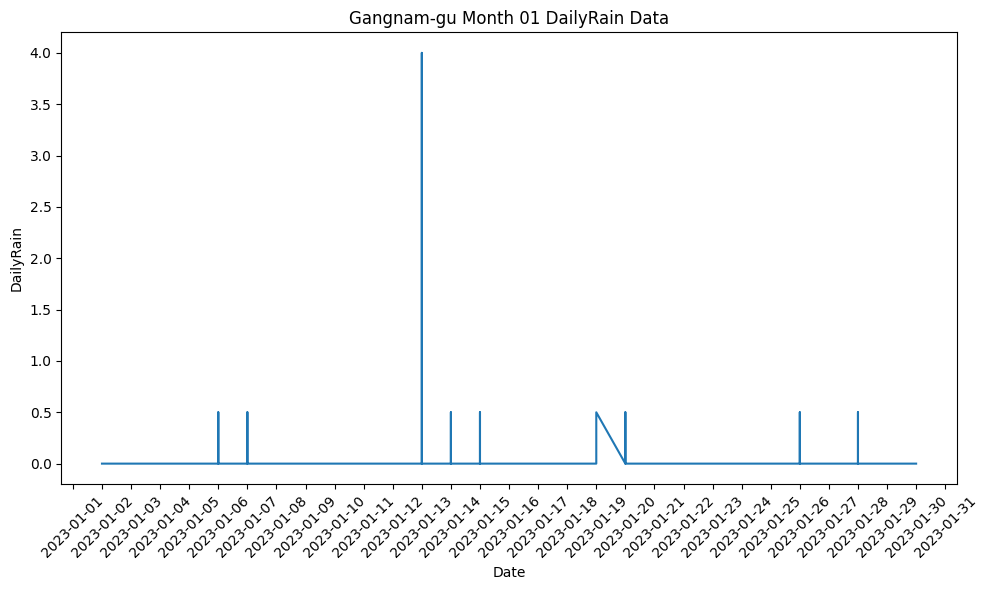

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 측정날짜를 datetime 형식으로 변환
gangnam['Date'] = pd.to_datetime(gangnam['Date'])

# 필터링을 위한 날짜 범위 설정
start_date = pd.to_datetime('2023-01-01')
end_date = pd.to_datetime('2023-01-31')

# 필터링된 데이터 추출
filtered_df = gangnam[(gangnam['Date'] > start_date) & (gangnam['Date'] < end_date)]

# 그래프 설정
fig, ax = plt.subplots(figsize=(10, 6))

# misemunji 칼럼 생성하든어쩌든 하기
ax.plot(filtered_df['Date'], filtered_df['DailyRain'])
ax.set_xlabel('Date')
ax.set_ylabel('DailyRain')
ax.set_title('Gangnam-gu Month 01 PM10 Data')

# x축 눈금 설정
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)
# plt.rcParams.update({'font.size': 12, 'font.family': 'NanumGothic'})
plt.tight_layout()

# 그래프 출력
plt.show()